In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# --- 1. Load the dataset ---
# Save your provided CSV as 'who_covid_short.csv' in the same directory as this script.
df = pd.read_csv('who_covid_short.csv')

In [1]:
pip install --user plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
# --- 2. Filter the data for a specific country (e.g., India) ---
country = "India"
df_country = df[df["Name"] == country].copy()

# --- 3. Simulate a date column and daily data ---
# Since your dataset is only cumulative, let's simulate 30 days of daily values for demonstration.
num_days = 30
date_range = pd.date_range("2024-04-01", periods=num_days, freq="D")
np.random.seed(0)
sim_daily_cases = np.random.randint(500, 5000, size=num_days)
sim_daily_deaths = np.random.randint(5, 100, size=num_days)

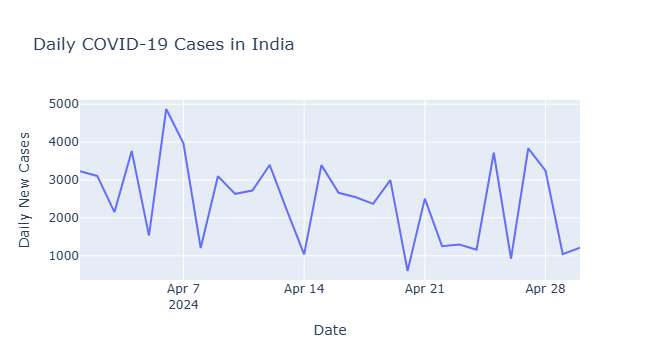

In [3]:
daily = pd.DataFrame({
    "Date_reported": date_range,
    "New_cases": sim_daily_cases,
    "New_deaths": sim_daily_deaths
})
daily["Cumulative_cases"] = daily["New_cases"].cumsum()
daily["Cumulative_deaths"] = daily["New_deaths"].cumsum()

# --- 4. Visualization 1: Line chart for daily cases over time ---
fig1 = px.line(
    daily,
    x="Date_reported",
    y="New_cases",
    title=f"Daily COVID-19 Cases in {country}",
    labels={"Date_reported": "Date", "New_cases": "Daily New Cases"}
)
fig1.update_traces(name="Daily New Cases")
fig1.update_layout(legend_title_text='Legend')
fig1.show()

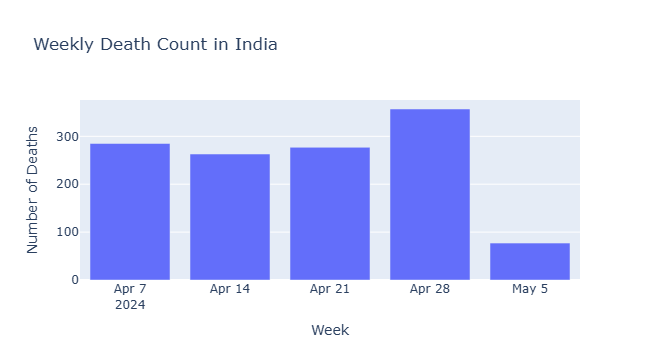

In [4]:
# --- 5. Visualization 2: Bar chart for deaths per week ---
daily.set_index("Date_reported", inplace=True)
weekly_deaths = daily["New_deaths"].resample("W").sum().reset_index()

fig2 = px.bar(
    weekly_deaths,
    x="Date_reported",
    y="New_deaths",
    title=f"Weekly Death Count in {country}",
    labels={"Date_reported": "Week", "New_deaths": "Number of Deaths"}
)
fig2.update_layout(legend_title_text='Legend')
fig2.show()



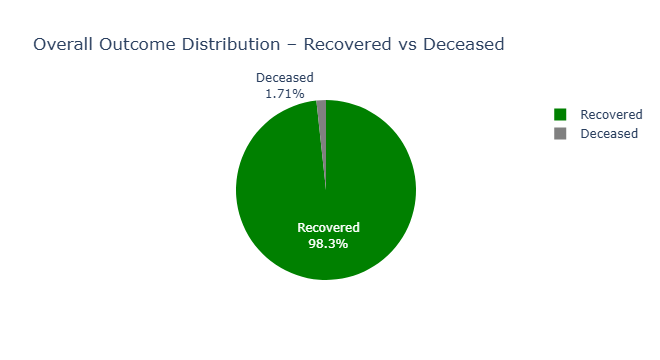

In [5]:
# --- 6. Visualization 3: Pie chart of total deaths vs. recoveries (if available) ---
# No recovery data is present; we simulate recoveries as: total recovered = cumulative cases - cumulative deaths
total_deaths = daily["Cumulative_deaths"].iloc[-1]
total_cases = daily["Cumulative_cases"].iloc[-1]
total_recovered = total_cases - total_deaths

fig3 = go.Figure(
    data=[go.Pie(
        labels=["Recovered", "Deceased"],
        values=[total_recovered, total_deaths],
        marker=dict(colors=["green", "gray"]),
        textinfo="label+percent"
    )]
)
fig3.update_layout(title="Overall Outcome Distribution – Recovered vs Deceased")
fig3.show()